In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('insurance.csv')

In [3]:
raw_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data = raw_data.drop(['region'],axis=1)

In [5]:
data.describe(include='all')

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338.000000
unique,NaN,2,NaN,NaN,2,NaN
top,NaN,male,NaN,NaN,no,NaN
freq,NaN,676,NaN,NaN,1064,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,16639.912515


In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
charges     0
dtype: int64

In [7]:
x = data[['age','bmi']].values
y = data['charges'].values

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 2)

In [9]:
mv_model = LinearRegression()
mv_model.fit(x_train,y_train)
y_pred = mv_model.predict(x_test)

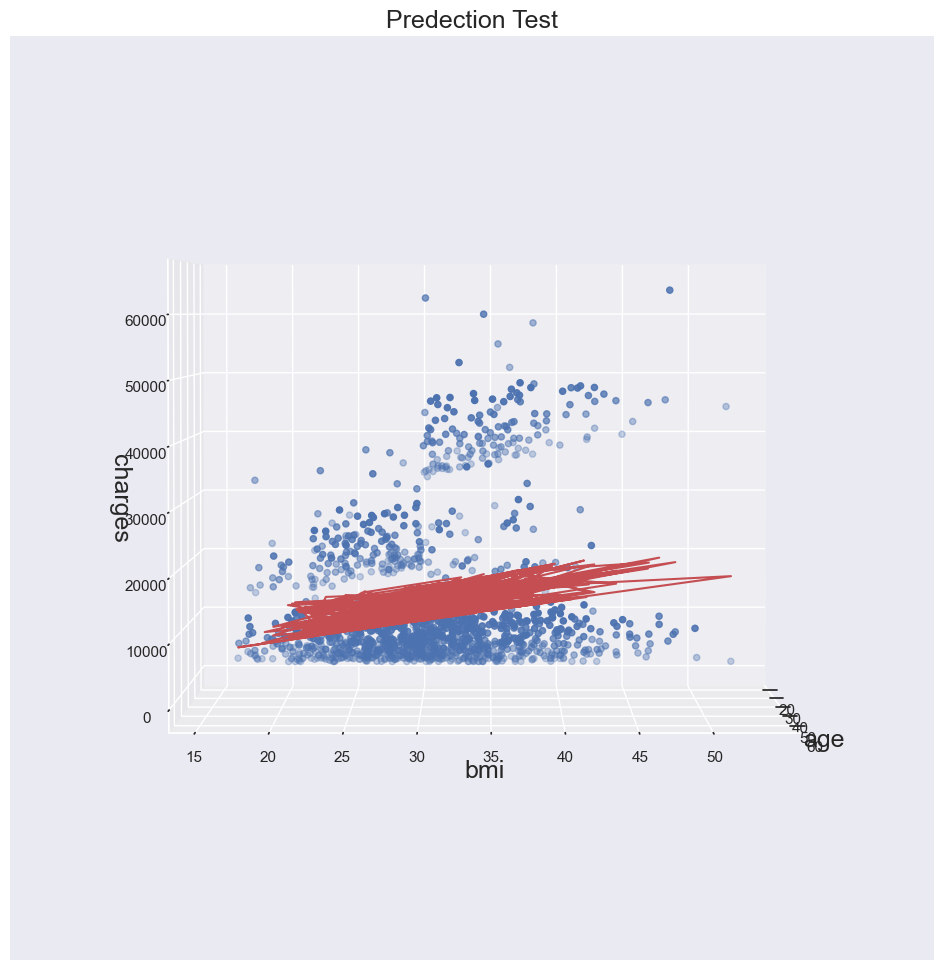

In [10]:
fig = plt.figure(figsize = (18,12))
ax = fig.add_subplot(projection = '3d')
ax.scatter(x[:,0],x[:,1],y)
plt.title('Predection Test', fontsize=18)
ax.plot(x_test[:,0],x_test[:,1],y_pred, c='r')
ax.set_xlabel('age', fontsize=18)
ax.set_ylabel('bmi', fontsize=18)
ax.set_zlabel('charges', fontsize=18)
ax.view_init(2,0)

Text(0.5, 1.0, 'charges and bmi')

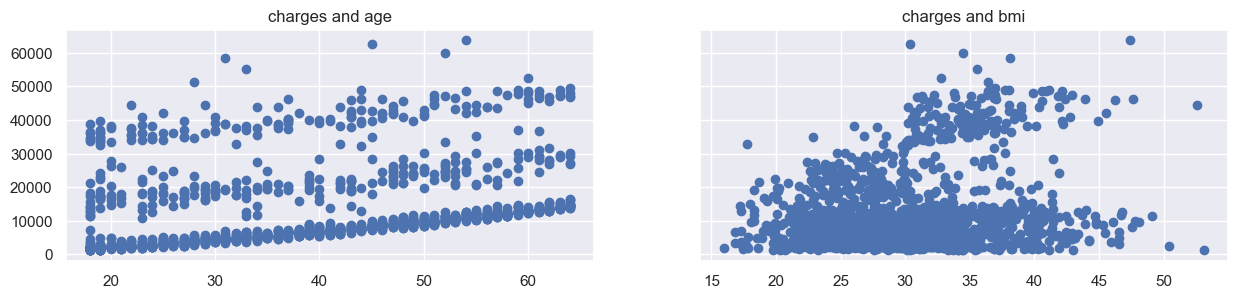

In [11]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize =(15,3))
ax1.scatter(data['age'],data['charges'])
ax1.set_title('charges and age')
ax2.scatter(data['bmi'],data['charges'])
ax2.set_title('charges and bmi')

In [12]:
log_charges = np.log(data['charges'])
data['log_charges'] = log_charges

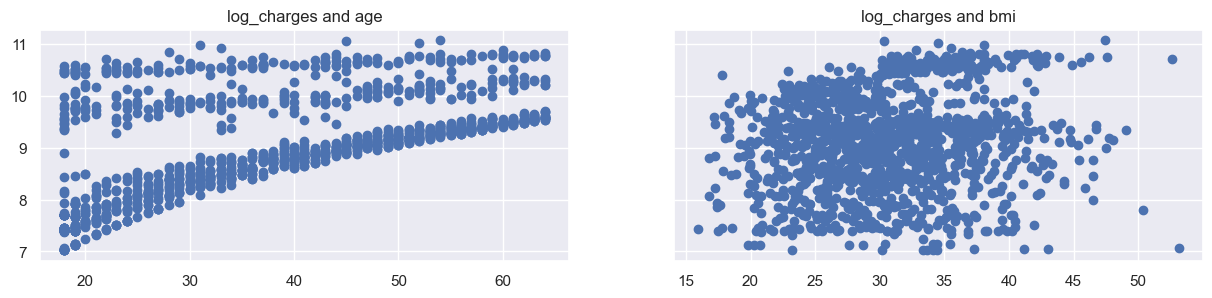

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize =(15,3))
ax1.scatter(data['age'],data['log_charges'])
ax1.set_title('log_charges and age')
ax2.scatter(data['bmi'],data['log_charges'])
ax2.set_title('log_charges and bmi')


plt.show()

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE = mean_squared_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
print('mean_squared_error', MSE)
print('mean_absolute_error', MAE)

mean_squared_error 127843408.03483875
mean_absolute_error 8886.341969135516


In [15]:
from mlxtend.evaluate import bias_variance_decomp
avg_Error, avg_bias, avg_var = bias_variance_decomp(mv_model, x_train, y_train, x_test, y_test, loss = 'mse', random_seed = 1)
print('MSE =', avg_Error )
print('Bias =', avg_bias)`
print('Variance =', avg_var )

MSE = 128334300.84903179
Bias = 127870561.84645271
Variance = 463739.0025790732


# Prediction

##### When the Age increase the charges of the insurance increase 

###### Also when the BMI increase the charges of the insurance increase

######  The data has a big Bias which lead to underfitting